<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/with_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = '/gdrive/My Drive/'

In [4]:
data_train_test = pd.read_csv(path +'Copy of train.psv', sep='|')

In [5]:
data_train_test.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,99.0,100.0,NaN,NaN,71.0,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,2,0
1,97.5,100.0,NaN,NaN,NaN,NaN,15.0,NaN,-16.0,16.0,NaN,7.19,25.0,NaN,72.5,13.5,58.0,8.1,112.5,1.7,NaN,73.0,8.6,1.75,3.2,4.4,3.65,NaN,26.9,8.35,74.4,15.65,104.0,93.0,69.66,0,1.0,0.0,-0.02,3,0
2,96.0,100.0,NaN,NaN,70.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,4,0
3,100.0,99.0,NaN,NaN,75.0,NaN,14.0,NaN,-15.0,11.0,NaN,7.24,24.0,96.0,NaN,12.0,NaN,7.7,113.0,1.6,NaN,85.0,8.9,1.60,2.9,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,5,0
4,102.0,100.0,36.00,NaN,74.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,6,0
5,92.0,100.0,NaN,NaN,79.0,NaN,14.0,NaN,-13.0,10.0,NaN,7.29,22.0,NaN,68.0,11.0,49.0,7.3,115.0,1.5,NaN,78.0,7.4,1.60,2.6,4.7,3.40,NaN,27.0,8.40,55.0,15.60,NaN,80.0,69.66,0,1.0,0.0,-0.02,7,0
6,90.0,100.0,NaN,NaN,62.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,8,0
7,95.0,99.0,NaN,151.0,93.0,67.0,21.0,NaN,-11.0,NaN,NaN,7.36,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,9,0
8,92.0,100.0,36.89,94.0,64.0,49.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,10,0
9,91.0,100.0,36.72,106.0,68.0,51.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,11,0


In [6]:
data_val = pd.read_csv(path + 'validation.psv', sep='|')

In [7]:
def fe_hr(data_train_test):
    data_train_test.loc[(data_train_test['HR'] >= 100) & (data_train_test['Age'] >= 10 ),
            'custom_hr'] = 'abnormal'
    data_train_test.loc[(data_train_test['HR'] < 100) & (data_train_test['HR'] > 60) & (data_train_test['Age'] >= 10 ),
            'custom_hr'] = 'normal'
    data_train_test.loc[(data_train_test['HR'] >= 70) & (data_train_test['HR'] < 190) & (data_train_test['Age'] < 10 ),
            'custom_hr'] = 'normal'
    data_train_test.loc[((data_train_test['HR'] < 70) | (data_train_test['HR'] >= 190)) & (data_train_test['Age'] < 10 ),
            'custom_hr'] = 'abnormal'
    data_train_test['custom_hr'].fillna('Missing', inplace=True)
    return data_train_test

In [8]:
def fe_temp(data_train_test):
    data_train_test.loc[(data_train_test['Temp'] >= 36.4) & (data_train_test['Temp'] < 37.6), 
            'custom_temp'] = 'normal'
    data_train_test.loc[(data_train_test['Temp'] < 36.4) | (data_train_test['Temp'] >= 37.6), 
            'custom_temp'] = 'abnormal'

    data_train_test['custom_temp'].fillna('Missing', inplace=True)
    return data_train_test

In [9]:
def fe_age(data_train_test):
    data_train_test.loc[data_train_test['Age'] >=65, 'custom_age'] = 'old'
    data_train_test.loc[data_train_test['Age'] <1, 'custom_age'] = 'infant'
    data_train_test.loc[(data_train_test['Age'] >=1) & (data_train_test['Age'] <65), 
            'custom_age'] = 'child/adult'
    return data_train_test

In [10]:
def fe_o2stat(data_train_test):
    data_train_test.loc[(data_train_test['O2Sat'] >= 90) & (data_train_test['O2Sat'] < 100), 
            'custom_o2stat'] = 'normal'
    data_train_test.loc[(data_train_test['O2Sat'] < 90) & (data_train_test['O2Sat'] >= 0), 
            'custom_o2stat'] = 'abnormal'

    data_train_test['custom_o2stat'].fillna('Missing', inplace=True)
    return data_train_test

In [11]:
    def fe_bp(data_train_test):
      data_train_test.loc[(data_train_test['SBP'] <90) & (data_train_test['DBP'] <60), 'custom_bp'] = 'low'

      data_train_test.loc[(data_train_test['SBP'].between(90,120, inclusive=True)) & 
            (data_train_test['DBP'].between(60,80, inclusive=True)), 
            'custom_bp'] = 'normal'


      data_train_test.loc[(data_train_test['SBP'].between(120,140, inclusive=True)) & 
            (data_train_test['DBP'].between(80,90, inclusive=True)), 
            'custom_bp'] = 'elevated'


      data_train_test.loc[(data_train_test['SBP'] > 140 ) & 
            (data_train_test['DBP'] > 90 ), 'custom_bp'] = 'high'

      data_train_test['custom_bp'].fillna('Missing', inplace=True)
      return data_train_test

In [12]:
def fe_rr(data_train_test):
    data_train_test.loc[(data_train_test['Resp'].between(30,60)) & (data_train_test['Age'] <1), 
            'custom_resp'] = 'normal'
    data_train_test.loc[((data_train_test['Resp'] < 30) | (data_train_test['Resp'] > 60)) & 
             (data_train_test['Age'] <1) ,'custom_resp'] = 'abnormal'


    data_train_test.loc[(data_train_test['Resp'].between(24,40)) & (data_train_test['Age'].between(1,3)), 
            'custom_resp'] = 'normal'
    data_train_test.loc[((data_train_test['Resp'] < 24) | (data_train_test['Resp'] > 40)) & 
             (data_train_test['Age'].between(1,3)) ,'custom_resp'] = 'abnormal'


    data_train_test.loc[(data_train_test['Resp'].between(22,34)) & (data_train_test['Age'].between(3,6)), 
            'custom_resp'] = 'normal'
    data_train_test.loc[((data_train_test['Resp'] < 22) | (data_train_test['Resp'] > 34)) & 
             (data_train_test['Age'].between(3,6)) ,'custom_resp'] = 'abnormal'


    data_train_test.loc[(data_train_test['Resp'].between(18,30)) & (data_train_test['Age'].between(6,12)), 
            'custom_resp'] = 'normal'
    data_train_test.loc[((data_train_test['Resp'] < 18) | (data_train_test['Resp'] > 30)) & 
             (data_train_test['Age'].between(6,12)) ,'custom_resp'] = 'abnormal'


    data_train_test.loc[(data_train_test['Resp'].between(12,20)) & (data_train_test['Age'] >12), 
            'custom_resp'] = 'normal'
    data_train_test.loc[((data_train_test['Resp'] < 12) | (data_train_test['Resp'] > 20)) & (data_train_test['Age'] >12),
            'custom_resp'] = 'abnormal'

    data_train_test['custom_resp'].fillna('Missing', inplace=True)


    return data_train_test

In [13]:
data_train_test = fe_age(data_train_test)
data_train_test = fe_bp(data_train_test)
data_train_test = fe_hr(data_train_test)
data_train_test = fe_o2stat(data_train_test)
data_train_test = fe_temp(data_train_test)
data_train_test = fe_rr(data_train_test)



data_val = fe_age(data_val)
data_val = fe_bp(data_val)
data_val = fe_hr(data_val)
data_train_test = fe_o2stat(data_val)
data_train_test = fe_temp(data_val)
data_train_test = fe_rr(data_val)

In [14]:
data_train_test.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,custom_age,custom_bp,custom_hr,custom_o2stat,custom_temp,custom_resp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,1,0,old,Missing,Missing,Missing,Missing,Missing
1,78.0,95.0,NaN,182.0,94.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,2,0,old,Missing,normal,normal,Missing,normal
2,84.0,92.0,NaN,183.0,113.0,72.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,3,0,old,Missing,normal,normal,Missing,normal
3,86.0,94.0,NaN,190.0,101.0,69.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,4,0,old,Missing,normal,normal,Missing,abnormal
4,83.0,91.5,NaN,194.5,111.5,82.5,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,5,0,old,Missing,normal,normal,Missing,abnormal


In [15]:
filtered_columns = ['Gender', 'custom_hr', 'custom_temp','custom_age', 
                    'custom_o2stat', 'custom_bp','custom_resp' ,'ICULOS', 
                    'HospAdmTime', 'SepsisLabel']

data_updated  = data_train_test[filtered_columns]


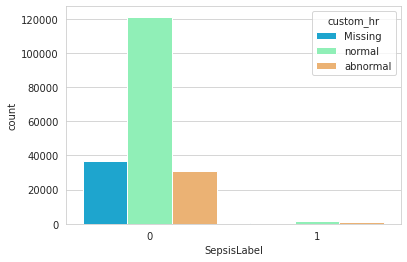

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='SepsisLabel',hue='custom_hr',data=data_updated,palette='rainbow')

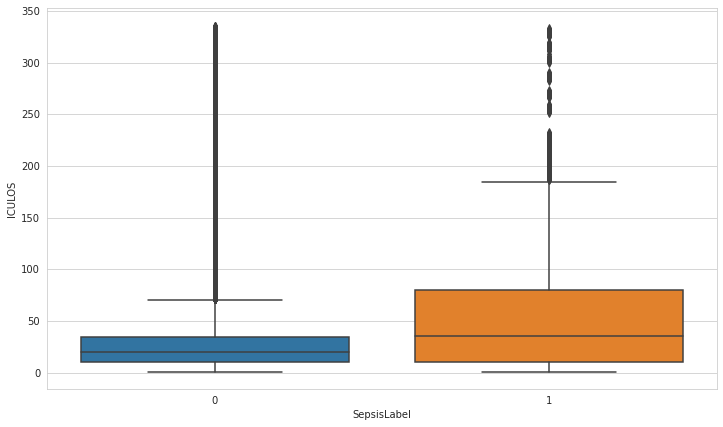

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SepsisLabel',y='ICULOS',data=data_updated)

In [18]:
from sklearn.preprocessing import LabelEncoder
customhr_labelencoder = LabelEncoder()
data_updated['custom_hr']= customhr_labelencoder.fit_transform(data_updated['custom_hr'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data_updated.head()

,Gender,custom_hr,custom_temp,custom_age,custom_o2stat,custom_bp,custom_resp,ICULOS,HospAdmTime,SepsisLabel
0,0,0,Missing,old,Missing,Missing,Missing,1,-6.85,0
1,0,2,Missing,old,normal,Missing,normal,2,-6.85,0
2,0,2,Missing,old,normal,Missing,normal,3,-6.85,0
3,0,2,Missing,old,normal,Missing,abnormal,4,-6.85,0
4,0,2,Missing,old,normal,Missing,abnormal,5,-6.85,0


In [20]:
customtemp_labelencoder = LabelEncoder()
data_updated['custom_temp']= customtemp_labelencoder.fit_transform(data_updated['custom_temp'])

customage_labelencoder = LabelEncoder()
data_updated['custom_age']= customage_labelencoder.fit_transform(data_updated['custom_age'])

customo2stat_labelencoder = LabelEncoder()
data_updated['custom_o2stat']= customo2stat_labelencoder.fit_transform(data_updated['custom_o2stat'])

custombp_labelencoder = LabelEncoder()
data_updated['custom_bp']= custombp_labelencoder.fit_transform(data_updated['custom_bp'])

customresp_labelencoder = LabelEncoder()
data_updated['custom_resp']= customresp_labelencoder.fit_transform(data_updated['custom_resp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

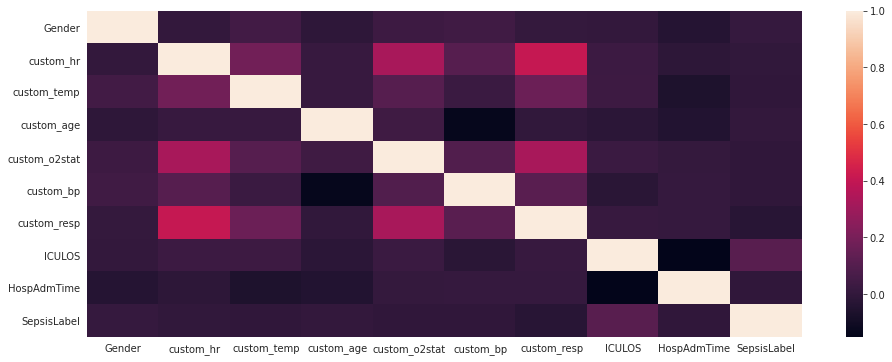

In [21]:
plt.figure(figsize=(16, 6))
sns.heatmap(data_updated.corr())

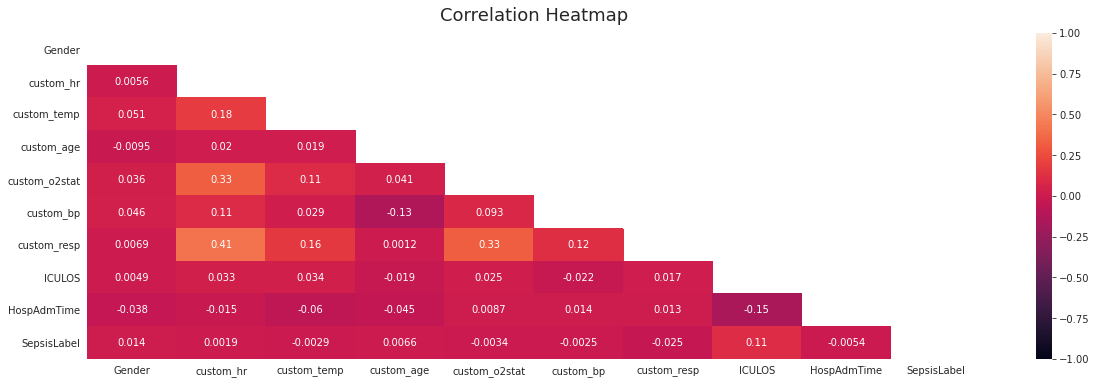

In [22]:
plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(data_updated.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_updated.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

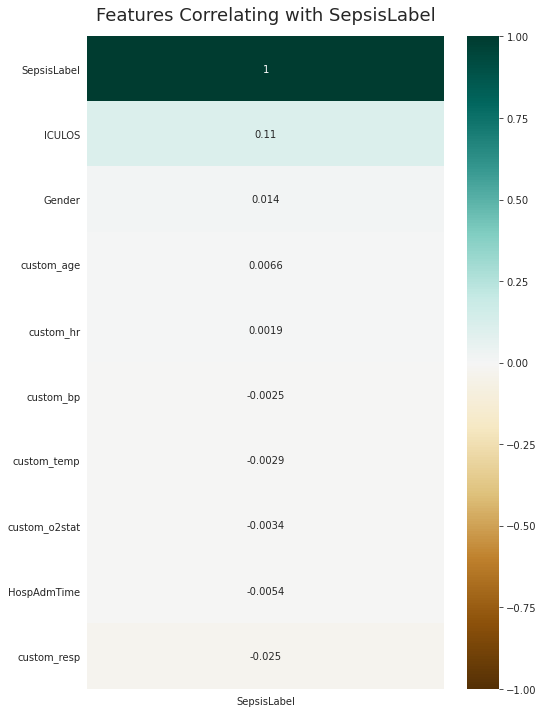

In [23]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_updated.corr()[['SepsisLabel']].sort_values(by='SepsisLabel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with SepsisLabel', fontdict={'fontsize':18}, pad=16);

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [25]:
X = data_updated[filtered_columns]
y = data_updated['SepsisLabel']

In [26]:
X=np.array(X)
y=np.array(y)
X.shape, y.shape

((191344, 10), (191344,))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143508, 10), (47836, 10), (143508,), (47836,))

In [28]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_train, y_train)

5

In [29]:
val = list(np.arange(0.001,1,0.1))
val

[0.001,
 0.101,
 0.201,
 0.30100000000000005,
 0.401,
 0.501,
 0.6010000000000001,
 0.7010000000000001,
 0.801,
 0.901]

In [31]:
parameters = {'solver':('newton-cg', 'liblinear'), 'C':val}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
log_reg = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)

log_reg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 0.101, 0.201, 0.30100000000000005, 0.401,
                               0.501, 0.6010000000000001, 0.7010000000000001,
                               0.801, 0.901],
                         'solver': ('newton-cg', 'liblinear')},
             pre_d

In [32]:
print(log_reg.best_params_)

{'C': 0.101, 'solver': 'newton-cg'}


**logistic regression**

In [33]:
yt_pred_log_reg = log_reg.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, yt_pred_log_reg ))

ac= accuracy_score(y_test, yt_pred_log_reg)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47064
           1       1.00      1.00      1.00       772

    accuracy                           1.00     47836
   macro avg       1.00      1.00      1.00     47836
weighted avg       1.00      1.00      1.00     47836

test_accuracy = 100.0 % 


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
f_scorer = make_scorer(fbeta_score, beta=1)

params = {'n_neighbors':[2, 100, 10, 5, 6, 50,70, 150]}

KNN = KNeighborsClassifier(algorithm='brute')
Knn_grid = GridSearchCV(KNN, params, n_jobs= -2, cv=fold, scoring=f_scorer, verbose=True)

Knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed: 38.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2,
             param_grid={'n_neighbors': [2, 100, 10, 5, 6, 50, 70, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1), verbose=True)

In [35]:
print(Knn_grid.best_params_)

{'n_neighbors': 2}


In [36]:
yt_pred_knn = Knn_grid.predict(X_test)

print(classification_report(y_test, yt_pred_knn ))

ac= accuracy_score(y_test, yt_pred_knn)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     47064
           1       0.96      0.28      0.43       772

    accuracy                           0.99     47836
   macro avg       0.97      0.64      0.71     47836
weighted avg       0.99      0.99      0.98     47836

test_accuracy = 98.81679070156368 % 


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

dtree.fit(X_train, y_train)

y_pred_dtree= dtree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47064
           1       1.00      1.00      1.00       772

    accuracy                           1.00     47836
   macro avg       1.00      1.00      1.00     47836
weighted avg       1.00      1.00      1.00     47836



In [39]:
prune_path = dtree.cost_complexity_pruning_path(X_train, y_train)
alphas = prune_path.ccp_alphas
impurities = prune_path.impurities

new_dTrees = []
i=0

for alpha in alphas:
    new_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha)
    new_dTree.fit(X_train, y_train)
    
    new_dTrees.append(new_dTree)

In [40]:
test_scores = [new_dTree.score(X_test, y_test) for new_dTree in new_dTrees]
print('max f1 test_score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

pruned_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[np.argmax(test_scores)])

pruned_dTree.fit(X_train, y_train)

ytpred_dTree = pruned_dTree.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, ytpred_dTree))

max f1 test_score = 1.0
position of max f1 = 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47064
           1       1.00      1.00      1.00       772

    accuracy                           1.00     47836
   macro avg       1.00      1.00      1.00     47836
weighted avg       1.00      1.00      1.00     47836



In [42]:
logreg_probs = log_reg.predict_proba(X_test)
Knn_grid_probs = Knn_grid.predict_proba(X_test)
Dtree_probs = pruned_dTree.predict_proba(X_test)

In [43]:
# keep probabilities for the positive outcome only
logreg_probs = logreg_probs[:, 1]
Knn_grid_probs = Knn_grid_probs[:, 1]
Dtree_probs = Dtree_probs[:, 1]

In [45]:
from sklearn.metrics import roc_auc_score

# calculate scores
logreg_auc = roc_auc_score(y_test, logreg_probs)
Knn_grid_auc = roc_auc_score(y_test, Knn_grid_probs)
Dtree_auc = roc_auc_score(y_test, Dtree_probs)

print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(Knn_grid_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

Logistic: ROC AUC= 100.0 %
KNN: ROC AUC= 82.8 %
DTree: ROC AUC= 100.0 %


In [46]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_test, logreg_probs)
Knn_fpr, Knn_tpr, Knn_thres = roc_curve(y_test, Knn_grid_probs)
Dtree_fpr, Dtree_tpr, Dtree_thres = roc_curve(y_test, Dtree_probs)

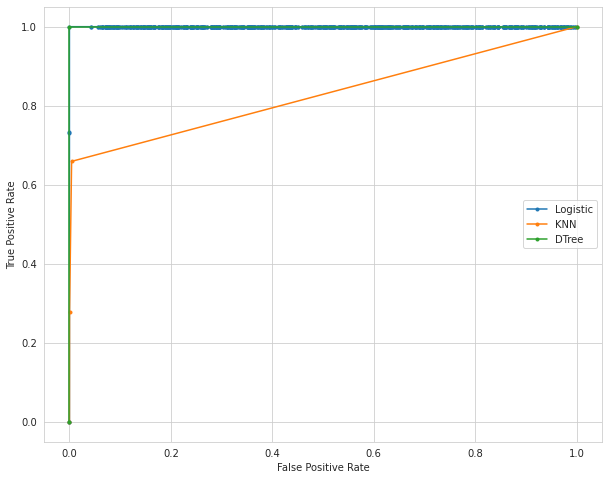

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()